In [1]:
import numpy as np             
import pandas as pd          
import matplotlib               
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.preprocessing import LabelEncoder   
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
ln=linear_model.LinearRegression()
import warnings
warnings.filterwarnings("ignore")
import math
import statsmodels.api as sm
import pylab as py

# Import data

In [2]:
dtr=pd.read_csv(r"C:\Users\shivu\Desktop\Property_Price_Train.csv")

In [3]:
dts=pd.read_csv(r"C:\Users\shivu\Desktop\Property_Price_Test.csv")

In [4]:
t=dts['Id']

In [5]:
#dtr.head()

In [6]:
dts.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
dtr.shape,dts.shape

((1459, 81), (1459, 80))

In [8]:
pd.set_option("display.max_rows",None)

In [9]:
#dtr.columns

In [10]:
pd.set_option("display.max_columns",None)

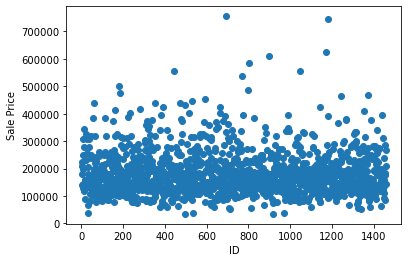

In [11]:
plt.scatter( dtr['Id'],dtr['Sale_Price'])
plt.xlabel("ID")
plt.ylabel("Sale Price")
plt.show()

In [12]:
dtr=dtr.drop(['Id'],axis=1)

# Data Visualistion

In [13]:
features_with_na=[features for features in dtr.columns if dtr[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(dtr[feature].isnull().mean(), 4),  ' % missing values')

Lot_Extent 0.1775  % missing values
Lane_Type 0.9376  % missing values
Brick_Veneer_Type 0.0055  % missing values
Brick_Veneer_Area 0.0055  % missing values
Basement_Height 0.0254  % missing values
Basement_Condition 0.0254  % missing values
Exposure_Level 0.026  % missing values
BsmtFinType1 0.0254  % missing values
BsmtFinType2 0.026  % missing values
Fireplace_Quality 0.4722  % missing values
Garage 0.0555  % missing values
Garage_Built_Year 0.0555  % missing values
Garage_Finish_Year 0.0555  % missing values
Garage_Quality 0.0555  % missing values
Garage_Condition 0.0555  % missing values
Pool_Quality 0.9952  % missing values
Fence_Quality 0.8074  % missing values
Miscellaneous_Feature 0.963  % missing values


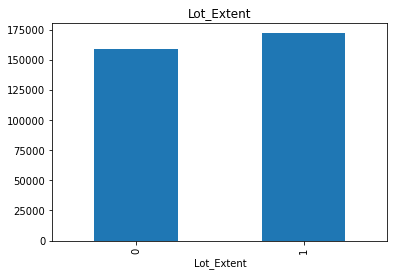

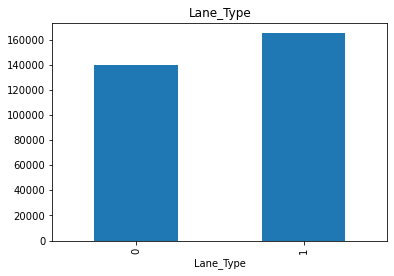

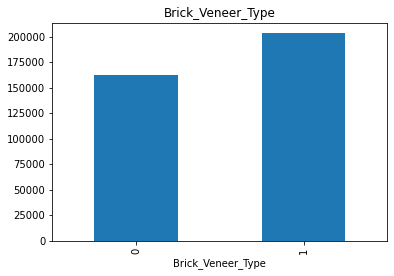

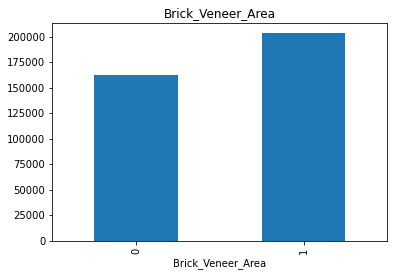

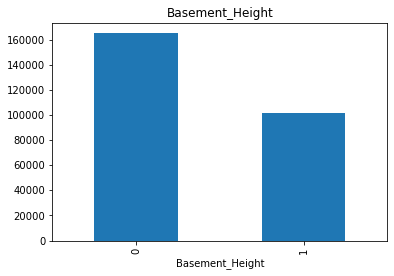

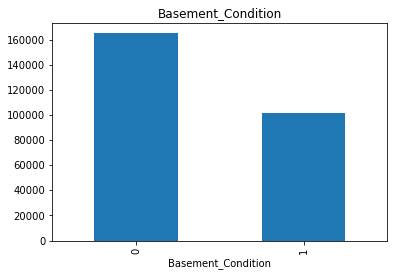

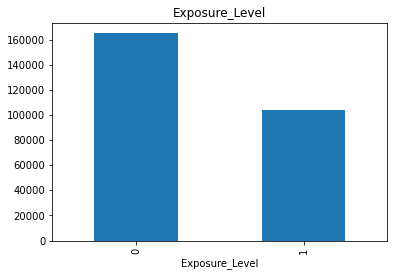

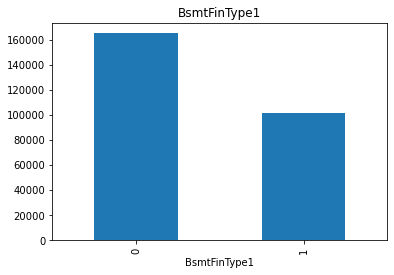

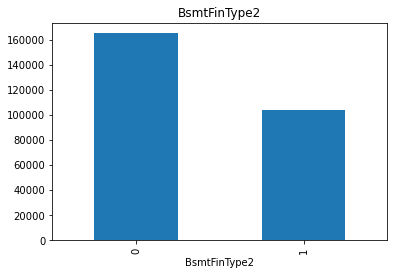

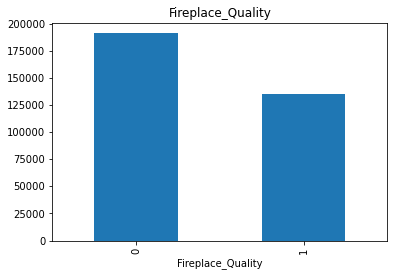

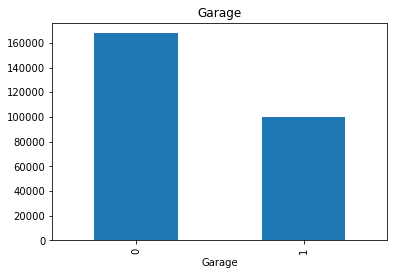

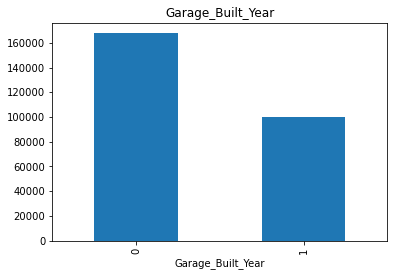

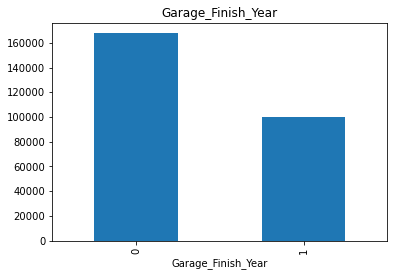

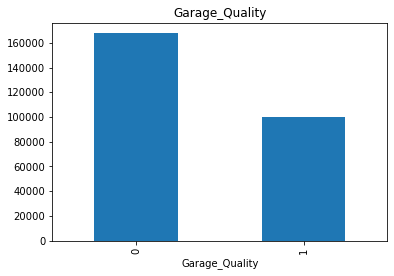

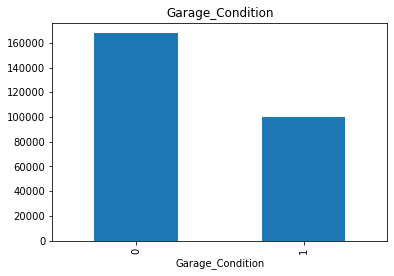

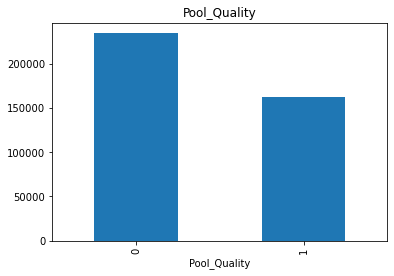

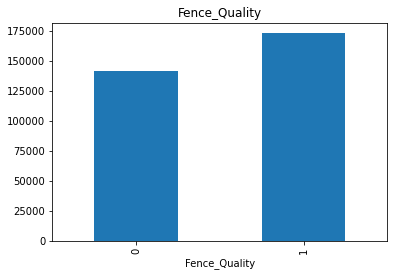

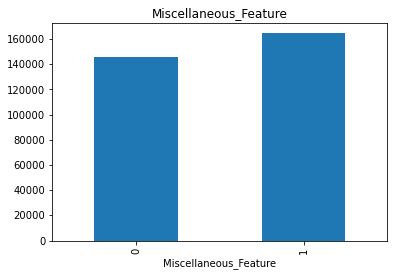

In [14]:
for feature in features_with_na:
    data = dtr.copy()
    
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    
    data.groupby(feature)['Sale_Price'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [15]:
numerical_features = [feature for feature in dtr.columns if dtr[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
numerical_features



Number of numerical variables:  37


['Building_Class',
 'Lot_Extent',
 'Lot_Size',
 'Overall_Material',
 'House_Condition',
 'Construction_Year',
 'Remodel_Year',
 'Brick_Veneer_Area',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'First_Floor_Area',
 'Second_Floor_Area',
 'LowQualFinSF',
 'Grade_Living_Area',
 'Underground_Full_Bathroom',
 'Underground_Half_Bathroom',
 'Full_Bathroom_Above_Grade',
 'Half_Bathroom_Above_Grade',
 'Bedroom_Above_Grade',
 'Kitchen_Above_Grade',
 'Rooms_Above_Grade',
 'Fireplaces',
 'Garage_Built_Year',
 'Garage_Size',
 'Garage_Area',
 'W_Deck_Area',
 'Open_Lobby_Area',
 'Enclosed_Lobby_Area',
 'Three_Season_Lobby_Area',
 'Screen_Lobby_Area',
 'Pool_Area',
 'Miscellaneous_Value',
 'Month_Sold',
 'Year_Sold',
 'Sale_Price']

In [16]:

year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['Construction_Year', 'Remodel_Year', 'Garage_Built_Year', 'Year_Sold']

In [17]:

for feature in year_feature:
    print(feature, dtr[feature].unique())

Construction_Year [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
Remodel_Year [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
Garage_Built_Year [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005

Text(0.5, 1.0, 'House Price vs YearSold')

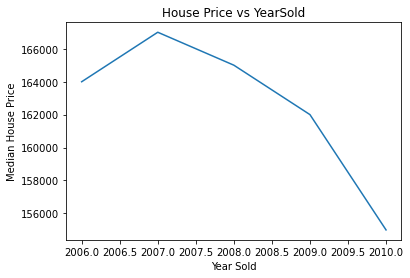

In [18]:


dtr.groupby('Year_Sold')['Sale_Price'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")



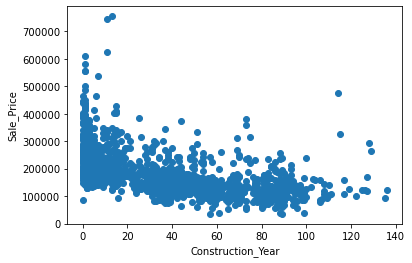

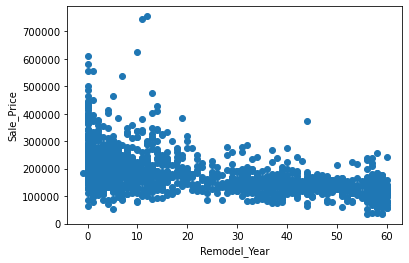

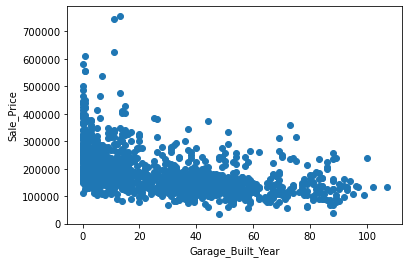

In [19]:


for feature in year_feature:
    if feature!='Year_Sold':
        data=dtr.copy()
       
        data[feature]=data['Year_Sold']-data[feature]

        plt.scatter(data[feature],data['Sale_Price'])
        plt.xlabel(feature)
        plt.ylabel('Sale_Price')
        plt.show()

    
    

In [20]:

discrete_feature=[feature for feature in numerical_features if len(dtr[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [21]:
discrete_feature

['Building_Class',
 'Overall_Material',
 'House_Condition',
 'LowQualFinSF',
 'Underground_Full_Bathroom',
 'Underground_Half_Bathroom',
 'Full_Bathroom_Above_Grade',
 'Half_Bathroom_Above_Grade',
 'Bedroom_Above_Grade',
 'Kitchen_Above_Grade',
 'Rooms_Above_Grade',
 'Fireplaces',
 'Garage_Size',
 'Three_Season_Lobby_Area',
 'Pool_Area',
 'Miscellaneous_Value',
 'Month_Sold']

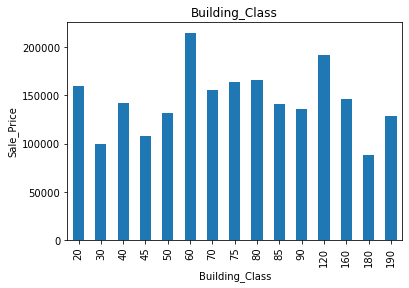

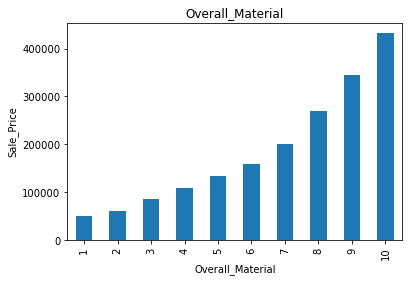

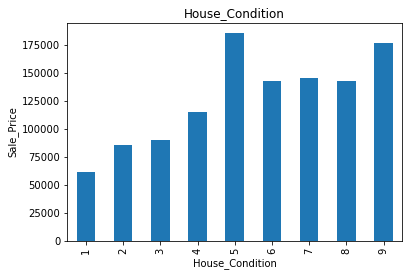

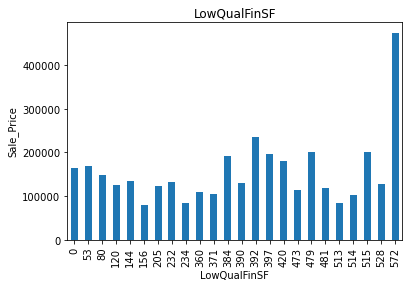

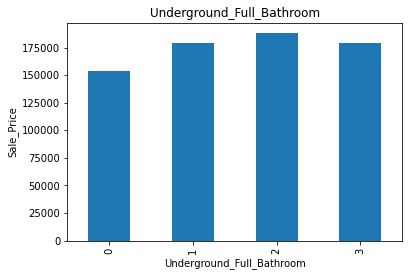

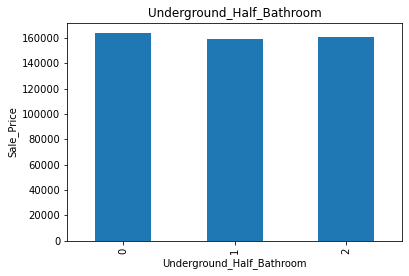

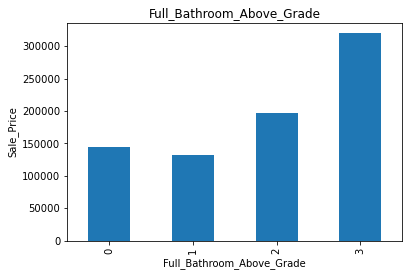

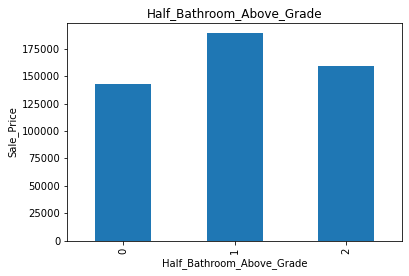

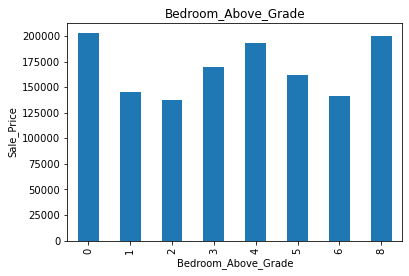

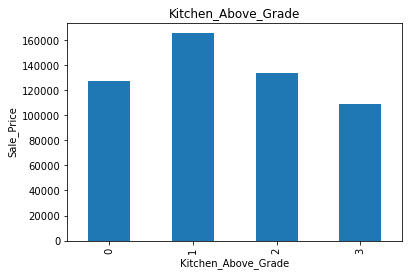

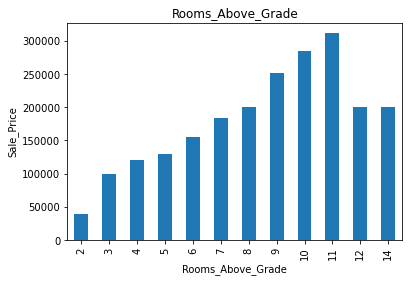

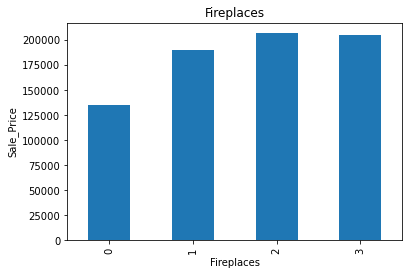

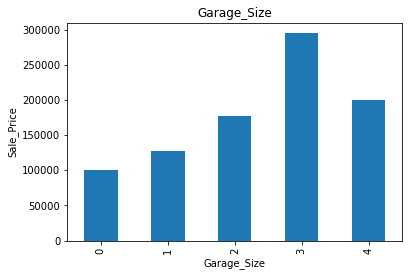

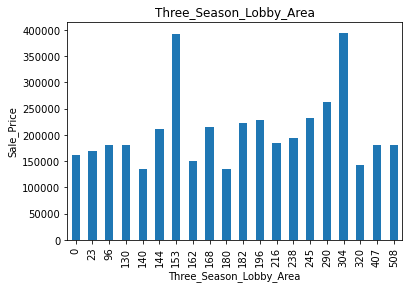

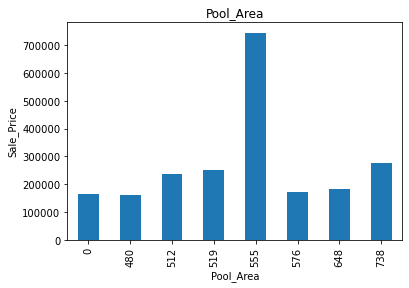

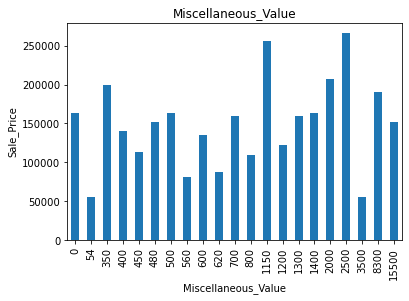

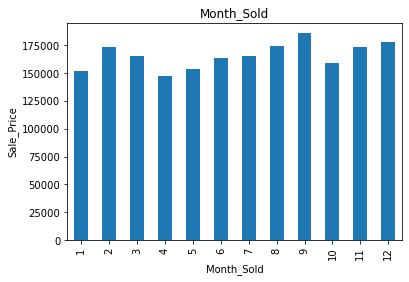

In [22]:

for feature in discrete_feature:
    data=dtr.copy()
    data.groupby(feature)['Sale_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale_Price')
    plt.title(feature)
    plt.show()

In [23]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


In [24]:
continuous_feature

['Lot_Extent',
 'Lot_Size',
 'Brick_Veneer_Area',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'First_Floor_Area',
 'Second_Floor_Area',
 'Grade_Living_Area',
 'Garage_Area',
 'W_Deck_Area',
 'Open_Lobby_Area',
 'Enclosed_Lobby_Area',
 'Screen_Lobby_Area',
 'Sale_Price']

array([[<AxesSubplot:title={'center':'Lot_Extent'}>,
        <AxesSubplot:title={'center':'Lot_Size'}>,
        <AxesSubplot:title={'center':'Brick_Veneer_Area'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'Total_Basement_Area'}>,
        <AxesSubplot:title={'center':'First_Floor_Area'}>],
       [<AxesSubplot:title={'center':'Second_Floor_Area'}>,
        <AxesSubplot:title={'center':'Grade_Living_Area'}>,
        <AxesSubplot:title={'center':'Garage_Area'}>,
        <AxesSubplot:title={'center':'W_Deck_Area'}>],
       [<AxesSubplot:title={'center':'Open_Lobby_Area'}>,
        <AxesSubplot:title={'center':'Enclosed_Lobby_Area'}>,
        <AxesSubplot:title={'center':'Screen_Lobby_Area'}>,
        <AxesSubplot:title={'center':'Sale_Price'}>]], dtype=object)

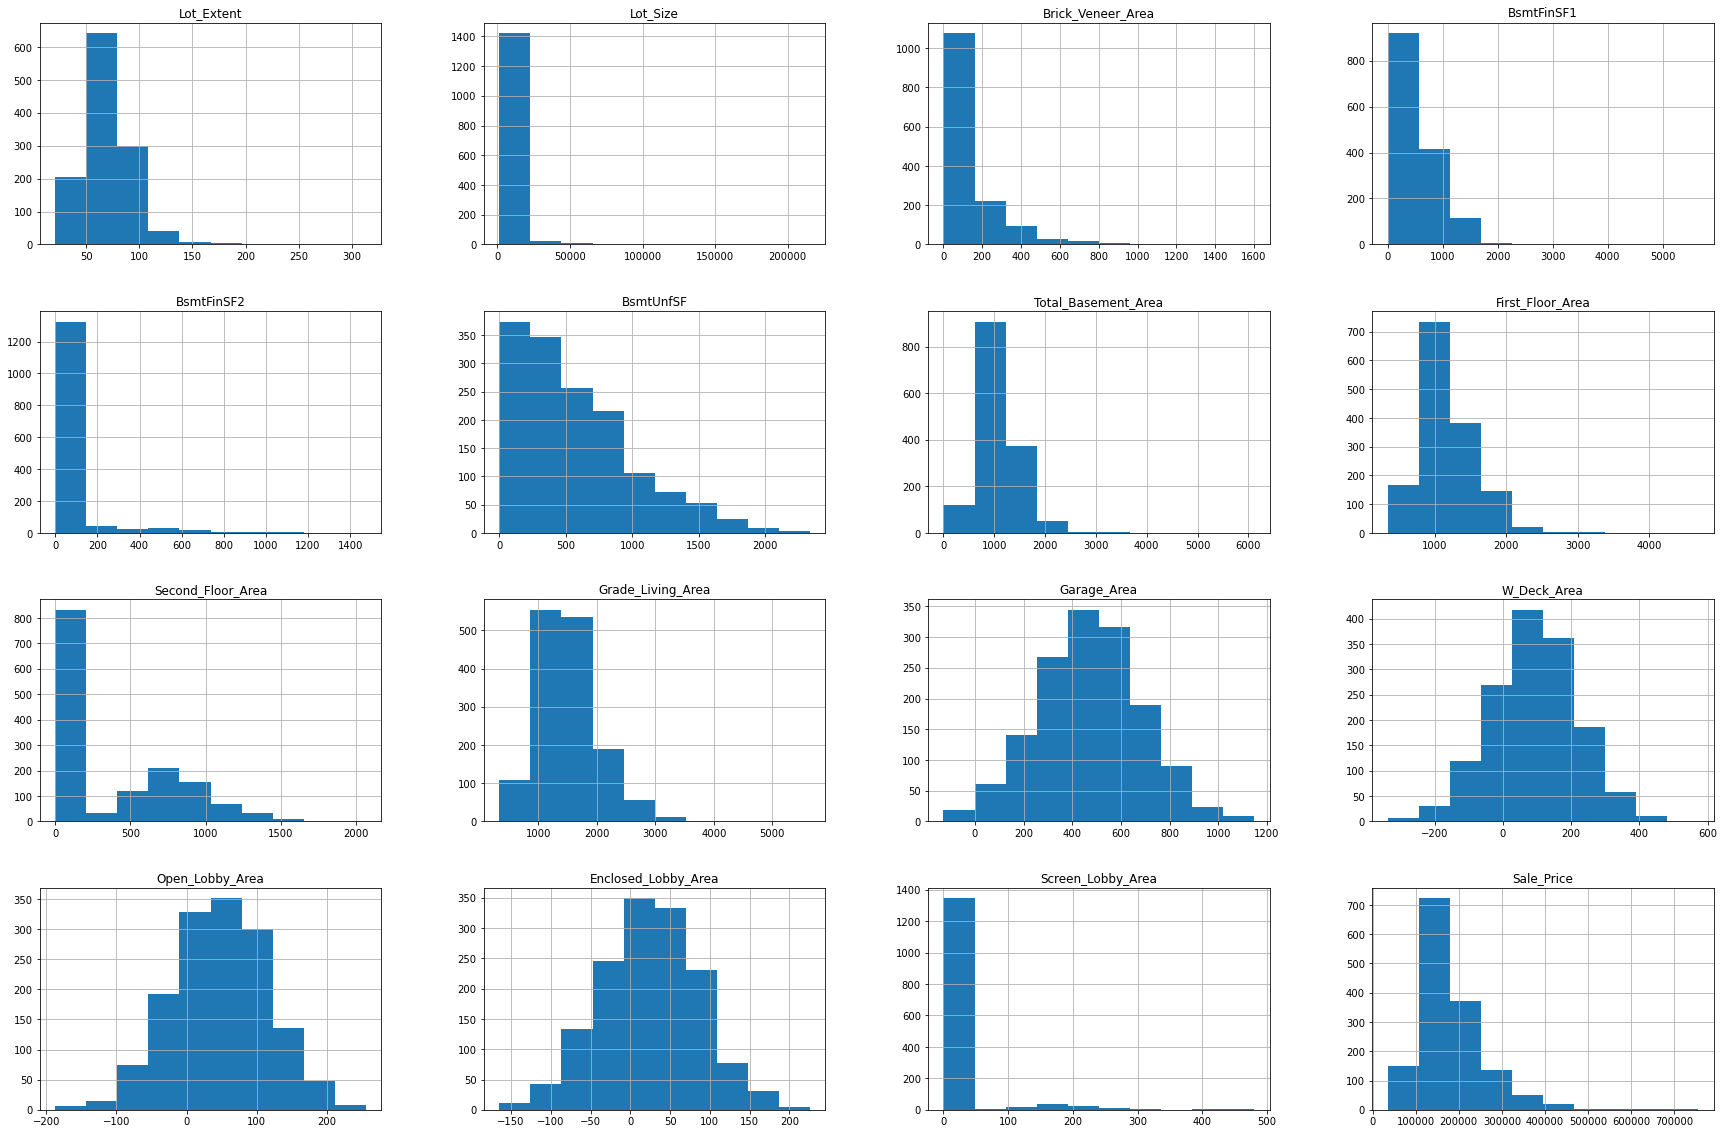

In [25]:
dtr.hist(continuous_feature,figsize=(30,20))

array([[<AxesSubplot:title={'center':'Building_Class'}>,
        <AxesSubplot:title={'center':'Overall_Material'}>,
        <AxesSubplot:title={'center':'House_Condition'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'Underground_Full_Bathroom'}>,
        <AxesSubplot:title={'center':'Underground_Half_Bathroom'}>,
        <AxesSubplot:title={'center':'Full_Bathroom_Above_Grade'}>,
        <AxesSubplot:title={'center':'Half_Bathroom_Above_Grade'}>],
       [<AxesSubplot:title={'center':'Bedroom_Above_Grade'}>,
        <AxesSubplot:title={'center':'Kitchen_Above_Grade'}>,
        <AxesSubplot:title={'center':'Rooms_Above_Grade'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>],
       [<AxesSubplot:title={'center':'Garage_Size'}>,
        <AxesSubplot:title={'center':'Three_Season_Lobby_Area'}>,
        <AxesSubplot:title={'center':'Pool_Area'}>,
        <AxesSubplot:title={'center':'Miscellaneous_Value'}>],
       [<AxesSubplot:tit

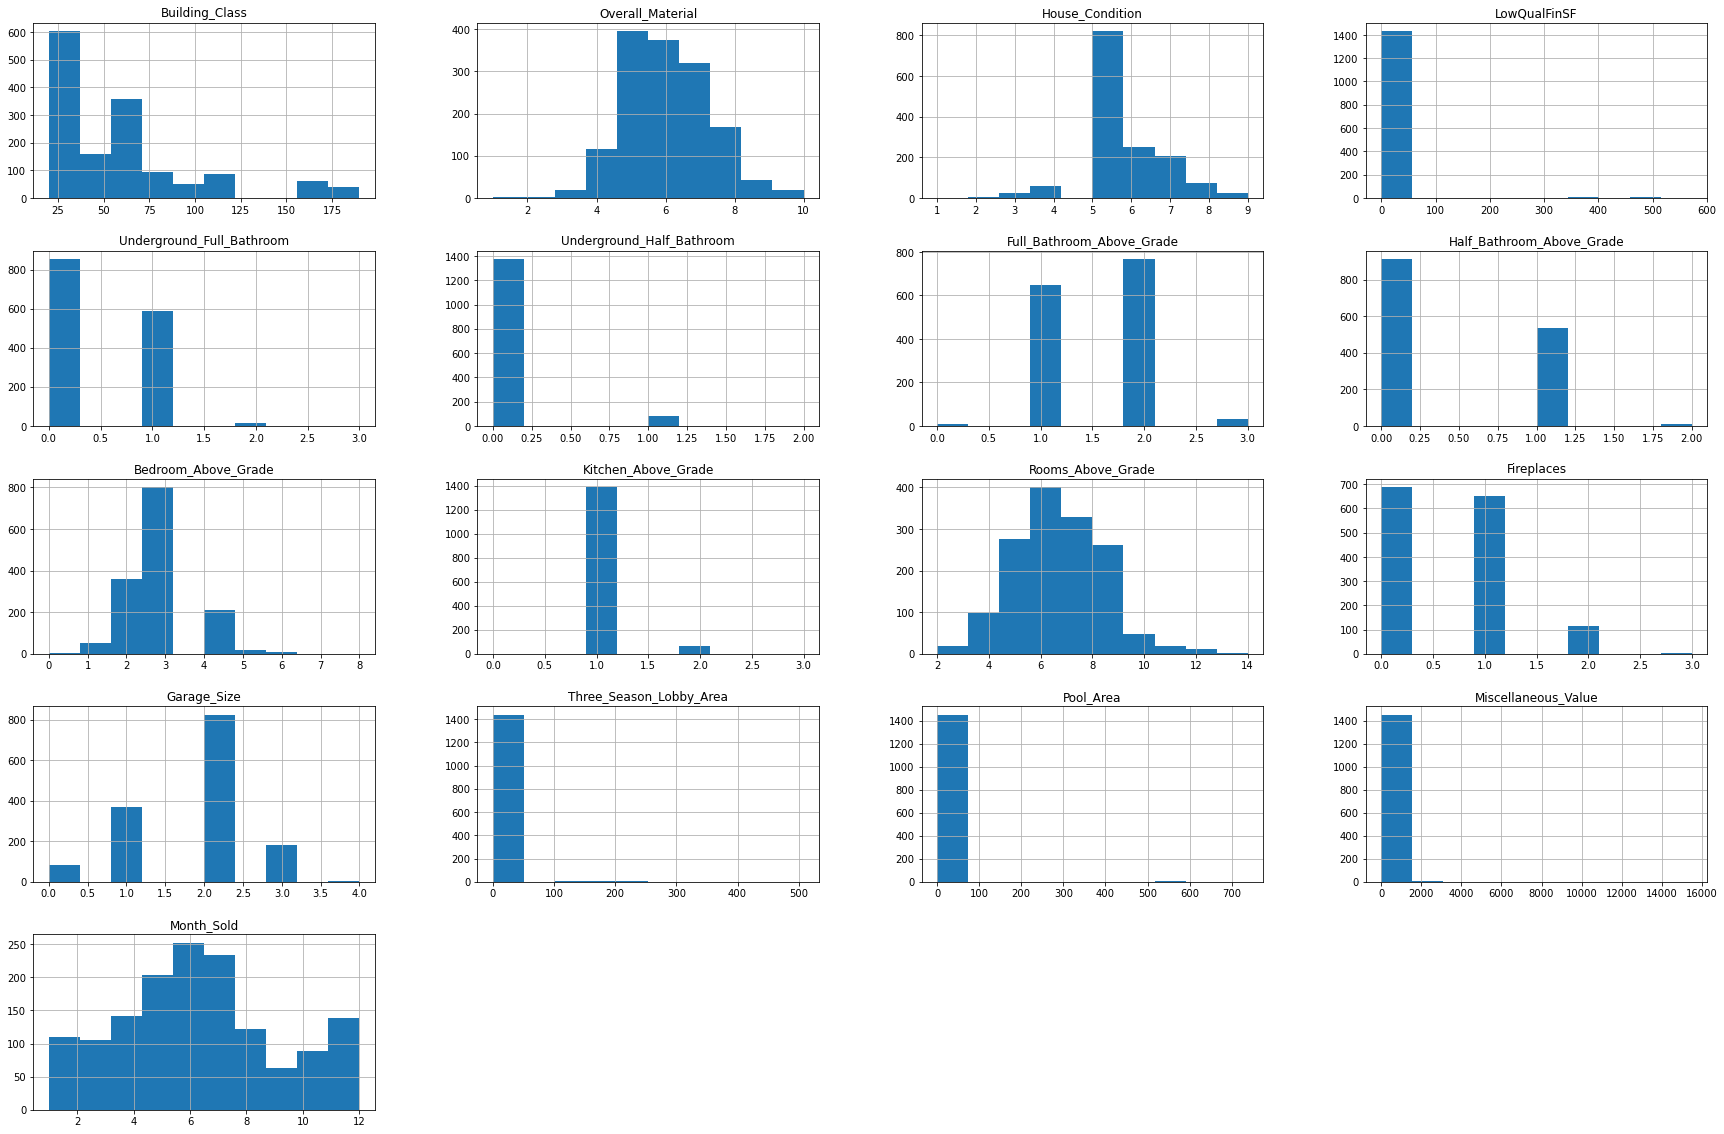

In [26]:
dtr.hist(discrete_feature,figsize=(30,20))

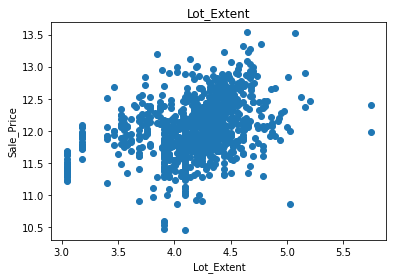

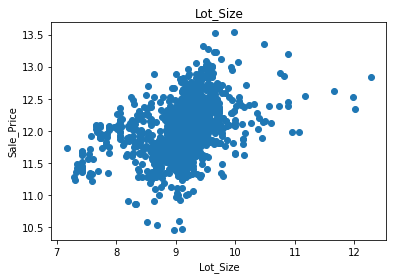

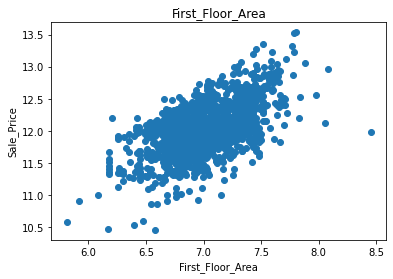

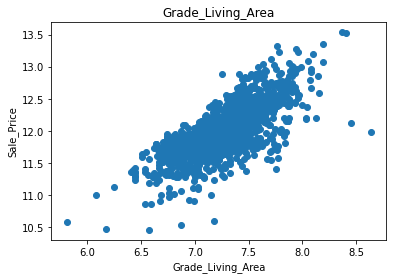

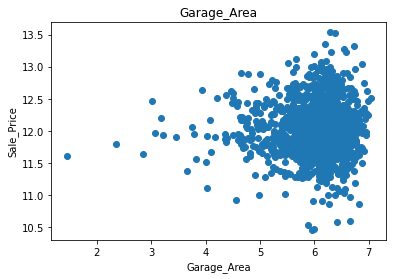

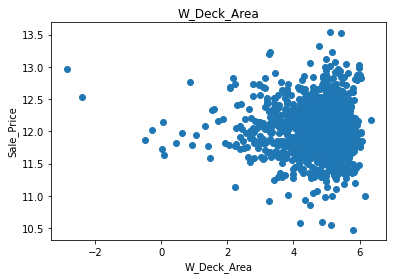

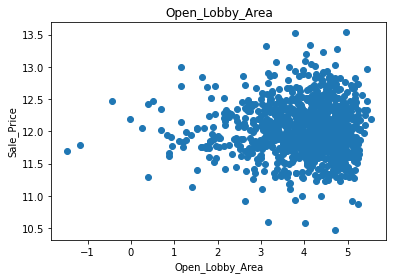

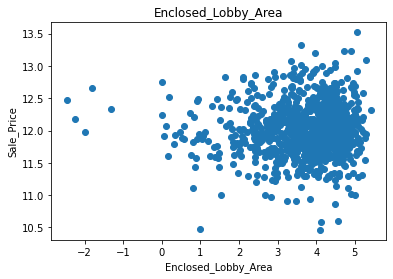

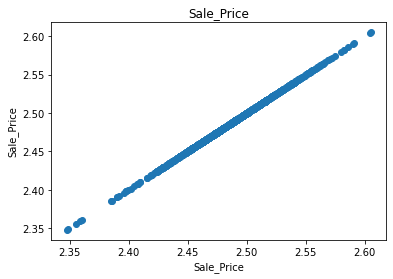

In [27]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dtr.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Sale_Price']=np.log(data['Sale_Price'])
        plt.scatter(data[feature],data['Sale_Price'])
        plt.xlabel(feature)
        plt.ylabel('Sale_Price')
        plt.title(feature)
        plt.show()

    

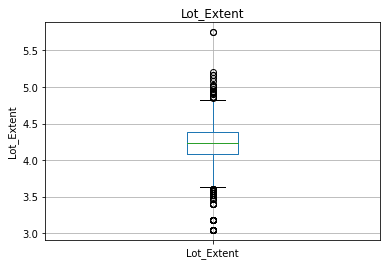

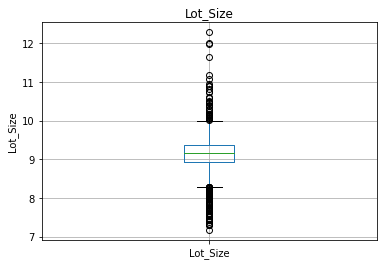

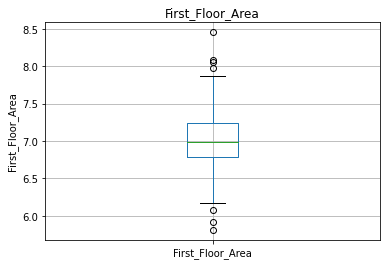

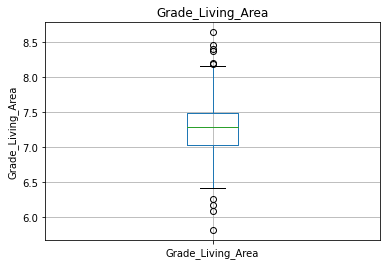

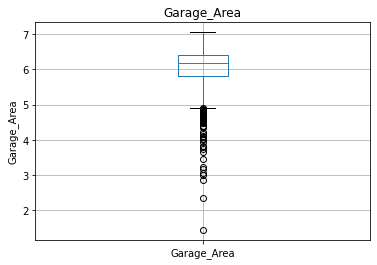

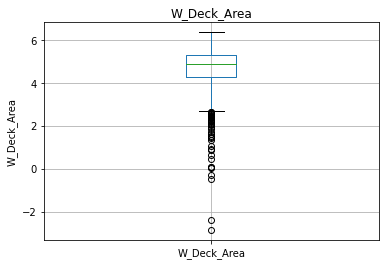

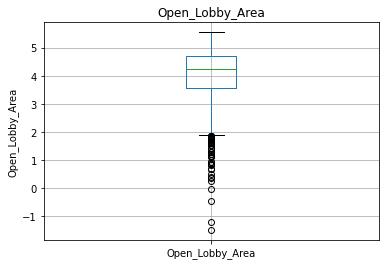

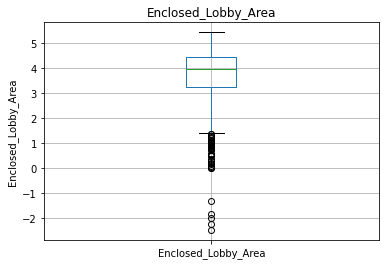

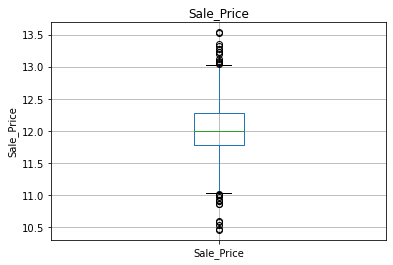

In [28]:
for feature in continuous_feature:
    data=dtr.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    

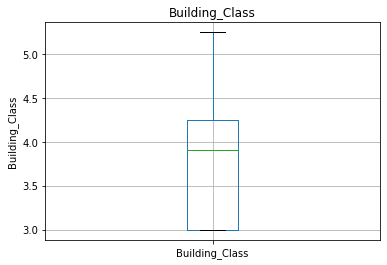

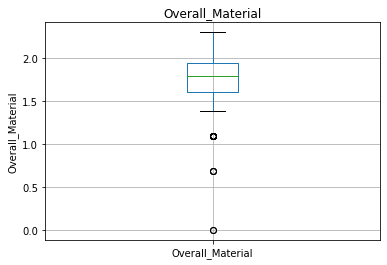

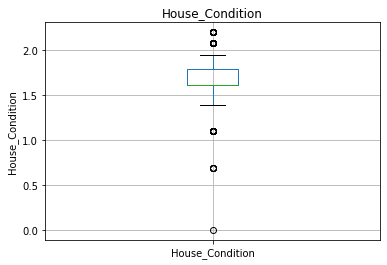

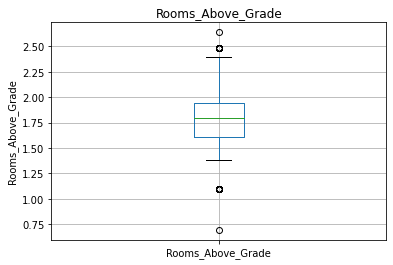

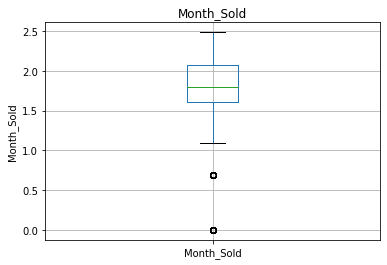

In [29]:
for feature in discrete_feature:
    data=dtr.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    

# Train Data Cleaning

In [30]:
dtr=dtr.drop(['Lane_Type','Pool_Quality','Fence_Quality','Miscellaneous_Feature'], axis = 1)

In [31]:
dtr.Lot_Extent.value_counts()
dtr.Basement_Height.value_counts()
dtr.Basement_Condition.value_counts()
dtr.Exposure_Level.value_counts()
dtr.BsmtFinType1.value_counts()
dtr.BsmtFinType2.value_counts()
dtr.Brick_Veneer_Type.value_counts()
dtr.Brick_Veneer_Area.value_counts()
dtr.Electrical_System.value_counts()
dtr.Fireplace_Quality.value_counts()
dtr.Garage.value_counts()
dtr.Garage_Quality.value_counts()
dtr.Garage_Condition.value_counts()
dtr.Garage_Built_Year.value_counts()
dtr.Garage_Finish_Year.value_counts()

Unf    605
RFn    422
Fin    351
Name: Garage_Finish_Year, dtype: int64

In [32]:
dtr.Lot_Extent=dtr.Lot_Extent.fillna(dtr.Lot_Extent.mean())
dtr.Basement_Height=dtr.Basement_Height.fillna("Fa")
dtr.Basement_Condition=dtr.Basement_Condition.fillna("Po")
dtr.Exposure_Level=dtr.Exposure_Level.fillna("Mn")
dtr.BsmtFinType1=dtr.BsmtFinType1.fillna("LwQ")
dtr.BsmtFinType2=dtr.BsmtFinType2.fillna("GLQ")
dtr.Brick_Veneer_Type=dtr.Brick_Veneer_Type.fillna("BrkCmn")
dtr.Brick_Veneer_Area=dtr.Brick_Veneer_Area.fillna(dtr.Brick_Veneer_Area.mean())
dtr.Electrical_System=dtr.Electrical_System.fillna("Mix")
dtr.Fireplace_Quality=dtr.Fireplace_Quality.fillna("Po")
dtr.Garage=dtr.Garage.fillna("2Types")
dtr.Garage_Quality=dtr.Garage_Quality.fillna("Po")
dtr.Garage_Condition=dtr.Garage_Condition.fillna("Ex")
dtr.Garage_Built_Year=dtr.Garage_Built_Year.fillna(2003.00)  
dtr.Garage_Finish_Year=dtr.Garage_Finish_Year.fillna('Fin')


In [33]:
dtr.dtypes

Building_Class                 int64
Zoning_Class                  object
Lot_Extent                   float64
Lot_Size                       int64
Road_Type                     object
Property_Shape                object
Land_Outline                  object
Utility_Type                  object
Lot_Configuration             object
Property_Slope                object
Neighborhood                  object
Condition1                    object
Condition2                    object
House_Type                    object
House_Design                  object
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                   object
Roof_Quality                  object
Exterior1st                   object
Exterior2nd                   object
Brick_Veneer_Type             object
Brick_Veneer_Area            float64
Exterior_Material             object
Exterior_Condition            object
F

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
dtr.Zoning_Class=le.fit_transform(dtr.Zoning_Class)
dtr.Road_Type=le.fit_transform(dtr.Road_Type)
dtr.Property_Shape=le.fit_transform(dtr.Property_Shape)
dtr.Land_Outline=le.fit_transform(dtr.Land_Outline)
dtr.Utility_Type=le.fit_transform(dtr.Utility_Type)
dtr.Lot_Configuration=le.fit_transform(dtr.Lot_Configuration)
dtr.Property_Slope=le.fit_transform(dtr.Property_Slope)
dtr.Neighborhood=le.fit_transform(dtr.Neighborhood)
dtr.Condition1=le.fit_transform(dtr.Condition1)
dtr.Condition2=le.fit_transform(dtr.Condition2)
dtr.House_Type=le.fit_transform(dtr.House_Type)
dtr.House_Design=le.fit_transform(dtr.House_Design)
dtr.Roof_Design=le.fit_transform(dtr.Roof_Design)
dtr.Roof_Quality=le.fit_transform(dtr.Roof_Quality)
dtr.Exterior1st=le.fit_transform(dtr.Exterior1st)
dtr.Exterior2nd=le.fit_transform(dtr.Exterior2nd)
dtr.Brick_Veneer_Type=le.fit_transform(dtr.Brick_Veneer_Type)
dtr.Exterior_Material=le.fit_transform(dtr.Exterior_Material)
dtr.Exterior_Condition=le.fit_transform(dtr.Exterior_Condition)
dtr.Foundation_Type=le.fit_transform(dtr.Foundation_Type)
dtr.Basement_Height=le.fit_transform(dtr.Basement_Height)
dtr.Basement_Condition=le.fit_transform(dtr.Basement_Condition)
dtr.Exposure_Level=le.fit_transform(dtr.Exposure_Level)
dtr.BsmtFinType1=le.fit_transform(dtr.BsmtFinType1)
dtr.BsmtFinType2=le.fit_transform(dtr.BsmtFinType2)
dtr.Heating_Type=le.fit_transform(dtr.Heating_Type)
dtr.Heating_Quality=le.fit_transform(dtr.Heating_Quality)
dtr.Air_Conditioning=le.fit_transform(dtr.Air_Conditioning)
dtr.Electrical_System=le.fit_transform(dtr.Electrical_System)
dtr.Kitchen_Quality=le.fit_transform(dtr.Kitchen_Quality)
dtr.Functional_Rate=le.fit_transform(dtr.Functional_Rate)
dtr.Fireplace_Quality=le.fit_transform(dtr.Fireplace_Quality)
dtr.Garage=le.fit_transform(dtr.Garage)
dtr.Garage_Quality=le.fit_transform(dtr.Garage_Quality)
dtr.Garage_Condition=le.fit_transform(dtr.Garage_Condition)
dtr.Pavedd_Drive=le.fit_transform(dtr.Pavedd_Drive)
dtr.Sale_Type=le.fit_transform(dtr.Sale_Type)
dtr.Sale_Condition=le.fit_transform(dtr.Sale_Condition)
dtr.Garage_Finish_Year=le.fit_transform(dtr.Garage_Finish_Year)

In [36]:
dtr.isnull().sum()

Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Type            0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinType1                 0
BsmtFinS

In [37]:
dtr.shape

(1459, 76)

# Outliers

In [38]:
def outliers(dtr,ft):
    Q1=dtr[ft].quantile(0.25)
    Q3=dtr[ft].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound=Q1-3*IQR
    upper_bound=Q3+3*IQR
    
    ls=dtr.index[(dtr[ft]<lower_bound) | (dtr[ft]>upper_bound)]
    return ls

In [39]:
index_list = []
for feature in [
 'Building_Class',
 'Lot_Extent',
 'Lot_Size',
 'Overall_Material',
 'House_Condition',
 'Construction_Year',
 'Remodel_Year',
 'Brick_Veneer_Area',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'First_Floor_Area',
 'Second_Floor_Area',
 'LowQualFinSF',
 'Grade_Living_Area',
 'Underground_Full_Bathroom',
 'Underground_Half_Bathroom',
 'Full_Bathroom_Above_Grade',
 'Half_Bathroom_Above_Grade',
 'Bedroom_Above_Grade',
 'Kitchen_Above_Grade',
 'Rooms_Above_Grade',
 'Fireplaces',
 'Garage_Built_Year',
 'Garage_Size',
 'Garage_Area',
 'W_Deck_Area',
 'Open_Lobby_Area',
 'Enclosed_Lobby_Area',
 'Three_Season_Lobby_Area',
 'Screen_Lobby_Area',
 'Pool_Area',
 'Miscellaneous_Value',
 'Month_Sold',
 'Year_Sold',
 'Sale_Price']:
    index_list.extend(outliers(dtr,feature))

In [40]:
index_list

[171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337,
 53,
 171,
 197,
 249,
 271,
 313,
 335,
 384,
 411,
 451,
 457,
 523,
 529,
 588,
 661,
 692,
 706,
 769,
 828,
 848,
 876,
 934,
 939,
 943,
 1057,
 1169,
 1184,
 1190,
 1260,
 1287,
 1298,
 1383,
 1396,
 1446,
 375,
 58,
 70,
 105,
 115,
 161,
 178,
 224,
 297,
 349,
 477,
 517,
 523,
 654,
 691,
 755,
 763,
 798,
 808,
 825,
 898,
 981,
 1111,
 1169,
 1228,
 1289,
 1298,
 1373,
 1417,
 1298,
 7,
 24,
 26,
 42,
 43,
 44,
 52,
 73,
 77,
 107,
 113,
 114,
 116,
 129,
 153,
 165,
 166,
 172,
 173,
 174,
 177,
 197,
 201,
 207,
 223,
 233,
 253,
 260,
 263,
 265,
 268,
 271,
 273,
 298,
 313,
 322,
 330,
 332,
 335,
 344,
 352,
 355,
 358,
 369,
 372,
 373,
 390,
 414,
 435,
 440,
 446,
 461,
 462,
 470,
 491,
 493,
 499,
 502,
 504,
 510,
 512,
 542,
 543,
 545,
 548,
 561,
 577,
 580,
 586,
 598,
 599,
 614,
 621,
 627,
 629,
 633,
 643,
 645,
 649,
 661,
 663,
 666,
 680,
 685,
 695

In [41]:
def remove(dtr,ls):
    ls=sorted(set(ls))
    dtr=dtr.drop(ls)
    return dtr

In [42]:
df=remove(dtr,index_list)
df.shape

(962, 76)

In [43]:
df.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,4,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,3,2,2003.0,1,2,1085.793744,4,4,2,163.788080,69.596115,20.337934,0,0,0,0,2,2008,8,4,208500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,4,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,7,1,4,2,2001.0,1,2,218.068403,4,4,2,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,4,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,7,1,2,6,1998.0,2,3,696.996439,4,4,2,46.948018,40.181415,60.921821,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,4,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,7,1,4,2,2000.0,1,3,568.859882,4,4,2,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,8,4,250000
6,20,3,75.0,10084,1,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,4,12,13,3,186.0,2,4,2,0,3,0,2,1369,5,0,317,1686,1,0,1,4,1694,0,0,1694,1,0,2,0,3,1,2,7,7,1,2,2,2004.0,1,2,555.415694,4,4,2,39.047177,118.613457,-7.064622,0,0,0,0,8,2007,8,4,307000


# Test data cleaning

In [44]:
dts.isnull().sum()

Id                              0
Building_Class                  0
Zoning_Class                    4
Lot_Extent                    227
Lot_Size                        0
Road_Type                       0
Lane_Type                    1352
Property_Shape                  0
Land_Outline                    0
Utility_Type                    2
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     1
Exterior2nd                     1
Brick_Veneer_Type              16
Brick_Veneer_Area              15
Exterior_Material               0
Exterior_Condition              0
Foundation_Typ

In [45]:
dts.dtypes

Id                             int64
Building_Class                 int64
Zoning_Class                  object
Lot_Extent                   float64
Lot_Size                     float64
Road_Type                     object
Lane_Type                     object
Property_Shape                object
Land_Outline                  object
Utility_Type                  object
Lot_Configuration             object
Property_Slope                object
Neighborhood                  object
Condition1                    object
Condition2                    object
House_Type                    object
House_Design                  object
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                   object
Roof_Quality                  object
Exterior1st                   object
Exterior2nd                   object
Brick_Veneer_Type             object
Brick_Veneer_Area            float64
E

In [46]:
dts=dts.drop(['Lane_Type','Pool_Quality','Fence_Quality','Miscellaneous_Feature'], axis = 1)

In [47]:
dts.Zoning_Class.value_counts()
dts.Lot_Extent.value_counts()
dts.Utility_Type.value_counts()
dts.Exterior1st.value_counts()
dts.Exterior2nd.value_counts()
dts.Brick_Veneer_Type.value_counts()
dts.Brick_Veneer_Area.value_counts()
dts.Basement_Height.value_counts()
dts.Basement_Condition.value_counts()
dts.Exposure_Level.value_counts()
dts.BsmtFinType1.value_counts()
dts.BsmtFinSF1.value_counts()
dts.BsmtFinType2.value_counts()
dts.BsmtFinSF2.value_counts()
dts.BsmtUnfSF.value_counts()
dts.Total_Basement_Area.value_counts()
dts.Underground_Full_Bathroom.value_counts()
dts.Underground_Half_Bathroom.value_counts()
dts.Kitchen_Quality.value_counts()
dts.Functional_Rate.value_counts()
dts.Fireplace_Quality.value_counts()
dts.Garage.value_counts()
dts.Garage_Size.value_counts()
dts.Garage_Area.value_counts()
dts.Garage_Quality.value_counts()
dts.Garage_Condition.value_counts()
dts.Sale_Type.value_counts()
dts.Garage_Finish_Year.value_counts()

Unf    625
RFn    389
Fin    367
Name: Garage_Finish_Year, dtype: int64

In [48]:
dts.Zoning_Class=dts.Zoning_Class.fillna("RHD")
dts.Lot_Extent=dts.Lot_Extent.fillna(dts.Lot_Extent.mean())
dts.Utility_Type=dts.Utility_Type.fillna("AllPub")
dts.Exterior1st=dts.Exterior1st.fillna("CB")
dts.Exterior2nd=dts.Exterior2nd.fillna("Stone")
dts.Brick_Veneer_Type=dts.Brick_Veneer_Type.fillna("BrkCmn")
dts.Brick_Veneer_Area=dts.Brick_Veneer_Area.fillna(dts.Brick_Veneer_Area.mean())
dts.Basement_Height=dts.Basement_Height.fillna("Fa")
dts.Basement_Condition=dts.Basement_Condition.fillna("Po")
dts.Exposure_Level=dts.Exposure_Level.fillna("Mn")
dts.BsmtFinType1=dts.BsmtFinType1.fillna("LwQ")
dts.BsmtFinSF1=dts.BsmtFinSF1.fillna(dts.BsmtFinSF1.mean())
dts.BsmtFinType2=dts.BsmtFinType2.fillna("GLQ")
dts.BsmtFinSF2=dts.BsmtFinSF2.fillna(dts.BsmtFinSF2.mean())
dts.BsmtUnfSF=dts.BsmtUnfSF.fillna(dts.BsmtUnfSF.mean())
dts.Total_Basement_Area=dts.Total_Basement_Area.fillna(dts.Total_Basement_Area.mean())
dts.Underground_Full_Bathroom=dts.Underground_Full_Bathroom.fillna(3.0)
dts.Underground_Half_Bathroom=dts.Underground_Half_Bathroom.fillna(2.0)
dts.Kitchen_Quality=dts.Kitchen_Quality.fillna("Fa")
dts.Functional_Rate=dts.Functional_Rate.fillna("MS")
dts.Fireplace_Quality=dts.Fireplace_Quality.fillna("Ex")
dts.Garage=dts.Garage.fillna("CarPort")
dts.Garage_Size=dts.Garage_Size.fillna(5.0)
dts.Garage_Area=dts.Garage_Area.fillna(dts.Garage_Area.mean())
dts.Garage_Quality=dts.Garage_Quality.fillna("Po")
dts.Garage_Condition=dts.Garage_Condition.fillna("Ex")
dts.Sale_Type=dts.Sale_Type.fillna("Con")
dts.Garage_Built_Year=dts.Garage_Built_Year.fillna(2003.00)  
dts.Garage_Finish_Year=dts.Garage_Finish_Year.fillna('Fin')

In [49]:
dts.isnull().sum()

Id                           0
Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Type            0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinT

In [50]:
dts.dtypes

Id                             int64
Building_Class                 int64
Zoning_Class                  object
Lot_Extent                   float64
Lot_Size                     float64
Road_Type                     object
Property_Shape                object
Land_Outline                  object
Utility_Type                  object
Lot_Configuration             object
Property_Slope                object
Neighborhood                  object
Condition1                    object
Condition2                    object
House_Type                    object
House_Design                  object
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                   object
Roof_Quality                  object
Exterior1st                   object
Exterior2nd                   object
Brick_Veneer_Type             object
Brick_Veneer_Area            float64
Exterior_Material             object
E

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:

dts.Road_Type=le.fit_transform(dts.Road_Type)
dts.Zoning_Class=le.fit_transform(dts.Zoning_Class)
dts.Property_Shape=le.fit_transform(dts.Property_Shape)
dts.Land_Outline=le.fit_transform(dts.Land_Outline)
dts.Utility_Type=le.fit_transform(dts.Utility_Type)
dts.Lot_Configuration=le.fit_transform(dts.Lot_Configuration)
dts.Property_Slope=le.fit_transform(dts.Property_Slope)
dts.Neighborhood=le.fit_transform(dts.Neighborhood)
dts.Condition1=le.fit_transform(dts.Condition1)
dts.Condition2=le.fit_transform(dts.Condition2)
dts.House_Type=le.fit_transform(dts.House_Type)
dts.House_Design=le.fit_transform(dts.House_Design)
dts.Roof_Design=le.fit_transform(dts.Roof_Design)
dts.Roof_Quality=le.fit_transform(dts.Roof_Quality)
dts.Exterior1st=le.fit_transform(dts.Exterior1st)
dts.Exterior2nd=le.fit_transform(dts.Exterior2nd)
dts.Brick_Veneer_Type=le.fit_transform(dts.Brick_Veneer_Type)
dts.Exterior_Material=le.fit_transform(dts.Exterior_Material)
dts.Exterior_Condition=le.fit_transform(dts.Exterior_Condition)
dts.Foundation_Type=le.fit_transform(dts.Foundation_Type)
dts.Basement_Height=le.fit_transform(dts.Basement_Height)
dts.Basement_Condition=le.fit_transform(dts.Basement_Condition)
dts.Exposure_Level=le.fit_transform(dts.Exposure_Level)
dts.BsmtFinType1=le.fit_transform(dts.BsmtFinType1)
dts.Exterior_Material=le.fit_transform(dts.Exterior_Material)
dts.Exterior_Condition=le.fit_transform(dts.Exterior_Condition)
dts.Foundation_Type=le.fit_transform(dts.Foundation_Type)
dts.Basement_Height=le.fit_transform(dts.Basement_Height)
dts.Basement_Condition=le.fit_transform(dts.Basement_Condition)
dts.Exposure_Level=le.fit_transform(dts.Exposure_Level)
dts.BsmtFinType2 =le.fit_transform(dts.BsmtFinType2 )
dts.Heating_Type=le.fit_transform(dts.Heating_Type)
dts.Heating_Quality=le.fit_transform(dts.Heating_Quality)
dts.Air_Conditioning=le.fit_transform(dts.Air_Conditioning)
dts.Electrical_System=le.fit_transform(dts.Electrical_System)
dts.Kitchen_Quality=le.fit_transform(dts.Kitchen_Quality)
dts.Functional_Rate=le.fit_transform(dts.Functional_Rate)
dts.Fireplace_Quality=le.fit_transform(dts.Fireplace_Quality)
dts.Garage=le.fit_transform(dts.Garage)
dts.Garage_Quality=le.fit_transform(dts.Garage_Quality)
dts.Garage_Condition=le.fit_transform(dts.Garage_Condition)
dts.Pavedd_Drive=le.fit_transform(dts.Pavedd_Drive)
dts.Sale_Type=le.fit_transform(dts.Sale_Type)
dts.Sale_Condition=le.fit_transform(dts.Sale_Condition)
dts.Garage_Finish_Year=le.fit_transform(dts.Garage_Finish_Year)

In [53]:
dts.shape

(1459, 76)

In [54]:
dts.dtypes

Id                             int64
Building_Class                 int64
Zoning_Class                   int32
Lot_Extent                   float64
Lot_Size                     float64
Road_Type                      int32
Property_Shape                 int32
Land_Outline                   int32
Utility_Type                   int32
Lot_Configuration              int32
Property_Slope                 int32
Neighborhood                   int32
Condition1                     int32
Condition2                     int32
House_Type                     int32
House_Design                   int32
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                    int32
Roof_Quality                   int32
Exterior1st                    int32
Exterior2nd                    int32
Brick_Veneer_Type              int32
Brick_Veneer_Area            float64
Exterior_Material              int64
E

In [55]:
dts.isnull().sum()

Id                           0
Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Type            0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinT

In [56]:
db_ts=dts.copy()


In [57]:
db_ts=db_ts.drop(['Id'], axis = 1)

In [58]:
def outliers1(dts,ft):
    Q1=dts[ft].quantile(0.25)
    Q3=dts[ft].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound=Q1-3*IQR
    upper_bound=Q3+3*IQR
    
    ls1=dts.index[(dts[ft]<lower_bound) | (dts[ft]>upper_bound) ]
    return ls1

In [59]:
index_list1 = []
for feature1 in ['Building_Class',
 'Lot_Extent',
 'Lot_Size',
 'Overall_Material',
 'House_Condition',
 'Brick_Veneer_Area',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'First_Floor_Area',
 'Second_Floor_Area',
 'LowQualFinSF',
 'Grade_Living_Area',
 'Underground_Full_Bathroom',
 'Underground_Half_Bathroom','Full_Bathroom_Above_Grade',
 'Bedroom_Above_Grade',
 'Kitchen_Above_Grade',
 'Rooms_Above_Grade',
 'Fireplaces',
 'Garage_Size',
 'Garage_Area',
 'W_Deck_Area',
 'Open_Lobby_Area',
 'Enclosed_Lobby_Area',
 'Three_Season_Lobby_Area',
 'Screen_Lobby_Area',
 'Pool_Area',
 'Miscellaneous_Value']:
    index_list1.extend(outliers1(dts,feature1))

In [60]:
def remove1(dts,ls1):
    ls1=sorted(set(ls1))
    dts=dts.drop(ls1)
    return dts

In [61]:
df1=remove(dts,index_list1)
idd=df1['Id']
df_test=df1.drop(['Id'],axis=1)
df_test.shape

(795, 75)

In [62]:
df.skew()

Building_Class                1.396426
Zoning_Class                 -1.599714
Lot_Extent                    0.024745
Lot_Size                      0.335493
Road_Type                   -31.016125
Property_Shape               -0.679674
Land_Outline                 -3.412640
Utility_Type                  0.000000
Lot_Configuration            -1.177698
Property_Slope                5.742510
Neighborhood                  0.069558
Condition1                    3.236878
Condition2                   23.033888
House_Type                    2.224082
House_Design                  0.272740
Overall_Material             -0.003974
House_Condition               0.943573
Construction_Year            -0.754894
Remodel_Year                 -0.718450
Roof_Design                   1.684702
Roof_Quality                 15.558597
Exterior1st                  -0.834544
Exterior2nd                  -0.789153
Brick_Veneer_Type            -0.073805
Brick_Veneer_Area             1.644875
Exterior_Material        

In [63]:
data=df.corr()
print(data.Building_Class.sort_values(ascending=False))

Building_Class               1.000000
House_Type                   0.792701
House_Design                 0.447736
Second_Floor_Area            0.306099
Half_Bathroom_Above_Grade    0.243917
Electrical_System            0.110821
Construction_Year            0.106838
Garage_Built_Year            0.105487
Property_Shape               0.098508
Full_Bathroom_Above_Grade    0.094733
Lot_Configuration            0.092158
Garage                       0.091458
BsmtFinType2                 0.089993
Remodel_Year                 0.085982
Overall_Material             0.083616
Brick_Veneer_Area            0.076221
Land_Outline                 0.066012
Fireplace_Quality            0.059775
Heating_Type                 0.055286
Grade_Living_Area            0.052276
Foundation_Type              0.049369
Underground_Full_Bathroom    0.046262
Garage_Quality               0.041824
Enclosed_Lobby_Area          0.041253
Exterior_Condition           0.033228
Basement_Condition           0.030258
Functional_R

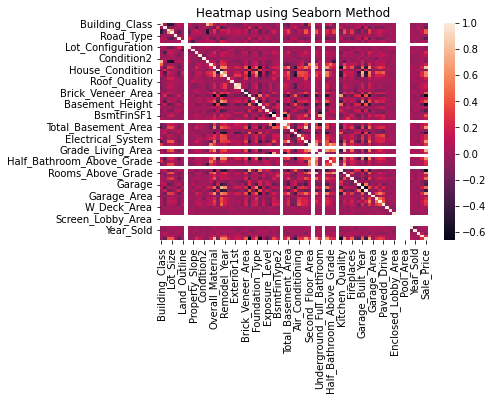

In [64]:
heatmap=sns.heatmap(data)
plt.title("Heatmap using Seaborn Method")
plt.show()

In [65]:
df.columns

Index(['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Road_Type',
       'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration',
       'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2',
       'House_Type', 'House_Design', 'Overall_Material', 'House_Condition',
       'Construction_Year', 'Remodel_Year', 'Roof_Design', 'Roof_Quality',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',


# Base Model

In [66]:
d=dtr.copy()

In [67]:
x=d.iloc[:,0:-1]
y=d.iloc[:,-1]


In [68]:
x.shape,y.shape

((1459, 75), (1459,))

In [69]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=101)

In [70]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1021, 75), (438, 75), (1021,), (438,))

In [71]:
ln.fit(xtrain,ytrain)

LinearRegression()

In [72]:
pred=ln.predict(xtest)
pred

array([208065.54027935, 180809.41853953,  67904.99957066, 147732.58924137,
       164022.11233624, 178563.92511199, 338213.06043778, 188097.15106894,
       168839.66730501, 152919.30456156, 157972.60455852, 193851.72778283,
       231863.22325781, 148599.38189144,  97892.34892729, 107675.77753106,
       249729.69944446, 262434.50069099, 127086.49146677, 125934.67506351,
       117363.60113634, 394144.57922041, 172606.76773919, 214282.81288008,
        71544.76744547,  96039.34081467, 124353.21758638, 190149.9586429 ,
       121309.37218671, 118974.30871627, 216895.7238231 , 129675.95400257,
       273423.24728707, 218712.2088332 , 135070.19339798, 119080.8586827 ,
       356796.02906233, 158904.05223711, 371725.71614435, 216679.17885141,
       183101.04860133, 201401.15959229, 212363.31660221, 122017.66236918,
       232318.45333499, 199648.70672917, 115041.43720934, 122841.54307665,
       143251.7418252 ,  48283.38136526, 123394.04967415, 145548.89896447,
       115764.75378247, 1

In [73]:
ln.intercept_

503233.12654414074

In [74]:
ln.coef_

array([-8.03471576e+01, -1.37085169e+03,  4.50396373e+01,  6.01009176e-01,
        3.53692381e+04, -1.12136192e+03,  1.40104537e+03, -2.81514991e+04,
       -9.53921809e+01,  1.92497944e+03,  1.42147532e+02, -1.91557918e+03,
       -1.74087622e+04, -9.92710761e+02, -7.25671723e+02,  9.56889471e+03,
        6.02575409e+03,  2.58137622e+02, -8.74503152e+00,  5.17719935e+02,
        4.83308231e+03, -1.87420348e+02,  9.03271905e+00,  6.27884749e+03,
        3.79322694e+01, -8.06492730e+03,  1.44498809e+01,  1.46621389e+03,
       -8.15752309e+03,  1.67385001e+03, -2.40061069e+03,  1.03768000e+03,
        2.00874903e+01,  7.45936392e+02,  1.16115634e+01, -6.45261008e+00,
        2.52464436e+01, -5.84730185e+03, -9.24835753e+02, -6.77745747e+03,
        2.42905319e+02,  2.62482481e+01,  3.51028251e+01, -3.62755741e+01,
        2.50754992e+01, -4.76670279e+02, -2.29017875e+03, -2.47518271e+03,
       -1.29550459e+03, -3.74144119e+03, -1.88826770e+04, -7.00066996e+03,
        1.31606777e+03,  

In [75]:
R2=ln.score(xtrain,ytrain)
R2

0.8814844579680875

In [76]:
adjR2=1-(((1-R2)*(1021-1))/(1021-75-1))
adjR2

0.8720784625687293

In [77]:
from sklearn import metrics

In [78]:
MSE=metrics.mean_squared_error(ytest,pred)
MSE

1849343659.0221162

In [79]:
error=ytest-pred
error

666     -79065.540279
104     -11309.418540
528      18095.000429
18       11267.410759
1151    -14122.112336
60      -20563.925112
70      -94213.060438
284      -8897.151069
860      21110.332695
327      -7669.304562
786     -18972.604559
191      -9851.727783
218      79636.776742
1276     13400.618109
713      31107.651073
1215     17324.222469
621      -9729.699444
1054     -7434.500691
596     -12582.491467
622       9065.324936
1384    -12363.601136
161      18355.420780
1141     24893.232261
0        -5782.812880
1337    -19044.767445
90       13860.659185
1202     -7353.217586
482     -35149.958643
1292    -13809.372187
194       8025.691284
1224    -32895.723823
1406      3324.045997
1250    -29423.247287
534     -40712.208833
899        -70.193398
835       8919.141317
1228     10497.970938
360      -2904.052237
515      31135.283856
2         6820.821149
781      -7201.048601
1317      7498.840408
501      14336.683398
1331     10482.337631
109     -42318.453335
81      -4

In [80]:
aerror=np.abs(error)
aerror

666      79065.540279
104      11309.418540
528      18095.000429
18       11267.410759
1151     14122.112336
60       20563.925112
70       94213.060438
284       8897.151069
860      21110.332695
327       7669.304562
786      18972.604559
191       9851.727783
218      79636.776742
1276     13400.618109
713      31107.651073
1215     17324.222469
621       9729.699444
1054      7434.500691
596      12582.491467
622       9065.324936
1384     12363.601136
161      18355.420780
1141     24893.232261
0         5782.812880
1337     19044.767445
90       13860.659185
1202      7353.217586
482      35149.958643
1292     13809.372187
194       8025.691284
1224     32895.723823
1406      3324.045997
1250     29423.247287
534      40712.208833
899         70.193398
835       8919.141317
1228     10497.970938
360       2904.052237
515      31135.283856
2         6820.821149
781       7201.048601
1317      7498.840408
501      14336.683398
1331     10482.337631
109      42318.453335
81       4

In [81]:
MAPE=np.mean(aerror/ytest)*100
MAPE

11.92125272410317

In [82]:
ACCURACY=100-MAPE
ACCURACY

88.07874727589683

In [83]:
predictions_reg = ln.predict(db_ts)
predictions_reg

array([ 97980.45829963, 146128.39832388, 148093.00697453, ...,
       123160.74615432,  93970.38660194, 208396.6290967 ])

In [84]:
sub_df= pd.DataFrame({'ID': t, 'Sale Price':np.round(predictions_reg)})
sub_df

,ID,Sale Price
0,1461,97980.0
1,1462,146128.0
2,1463,148093.0
3,1464,156651.0
4,1465,158537.0
5,1466,145171.0
6,1467,161668.0
7,1468,139334.0
8,1469,176277.0
9,1470,87163.0


In [85]:
sub_df.to_csv('base_prediction.csv')

# Fit Model

In [86]:
d_x=df.iloc[:,0:-1]
d_y=df.iloc[:,-1]

In [87]:
d_xtrain,d_xtest,d_ytrain,d_ytest=train_test_split(d_x,d_y,test_size=0.2,random_state=101)

In [88]:
d_xtrain.shape,d_xtest.shape,d_ytrain.shape,d_ytest.shape

((769, 75), (193, 75), (769,), (193,))

In [89]:
ln.fit(d_xtrain, d_ytrain)

LinearRegression()

In [90]:
ln.coef_

array([ 6.49660045e+00, -1.99298330e+03,  7.99577424e+01,  9.93831683e-01,
        1.77741257e+03, -4.31288292e+02, -2.25532827e+03, -1.19586403e-08,
       -5.19581579e+02,  5.01293082e+03,  1.96821837e+02, -8.71660870e+02,
        4.47846789e+03, -2.06136085e+03, -1.94492396e+03,  7.85165276e+03,
        6.95644139e+03,  3.30043430e+02,  5.09224350e+01,  2.36858583e+02,
       -8.71026609e+03, -2.57158718e+02, -1.78076952e+01,  2.33960103e+03,
        1.39160567e+01, -7.45771612e+03,  1.16137610e+03,  2.65831912e+03,
       -4.75355433e+03,  7.88598724e+02, -2.03843259e+03,  8.17254107e+02,
        2.53024114e+01, -5.22772966e+03,  3.63797881e-12, -1.53915611e-01,
        2.51484958e+01, -6.27551366e+03, -1.18076992e+02, -1.61961020e+03,
       -9.18841406e+02,  1.45805975e+01,  2.09448705e+01, -2.04636308e-12,
        3.55254680e+01,  3.07644308e+03, -9.09494702e-13, -1.52699830e+03,
        1.72047578e+03, -6.90432294e+03, -3.18323146e-12, -6.02770403e+03,
        4.01954428e+03,  

In [91]:
ln.intercept_

178166.35411681427

In [92]:
li_pred=ln.predict(d_xtest)
li_pred

array([ 85761.69243284, 150292.47733   , 212600.4882014 ,  94936.85659107,
       297349.19982469, 310265.85616839, 209615.37095653, 133829.09459309,
       180128.5415887 , 204040.63948102, 177494.14521677, 120183.9921621 ,
        92921.71996182, 283977.00350073, 126983.32782683, 103851.58118953,
       128300.11425849, 187108.72366724,  89227.85838586, 232192.39023489,
       240654.88043004, 125534.71975036, 216904.96136339, 374936.60366283,
       123322.04874363, 346199.77910119, 248303.83828918, 198394.1008956 ,
       124733.75209953, 198428.69082367,  85595.91183963, 169098.45799437,
       124431.27611454, 248959.08108083, 222475.90234357, 306522.32477367,
       186315.0237243 , 183848.98642773,  38988.74923142, 133435.07858986,
        99159.33431203, 168611.46806332, 346705.96508904, 314024.3144422 ,
       139524.34735861, 260753.6438561 , 127670.77385172, 115626.3874683 ,
        43125.35233321, 163004.03314539, 126606.48880449, 140068.94173741,
       155447.64648885, 1

In [93]:
li_r2=ln.score(d_xtrain,d_ytrain)
li_r2

0.9160233247459117

In [94]:
li_adjr2=1-(((1-li_r2)*(769-1))/(769-75-1))

In [95]:
li_adjr2

0.9069349399781532

In [96]:
from sklearn import metrics

In [97]:
li_MAE=metrics.mean_absolute_error(d_ytest,li_pred)
li_MAE

16099.444587813548

In [98]:
li_MSE=metrics.mean_squared_error(d_ytest,li_pred)
li_MSE

463993763.5573181

In [99]:
li_RMSE=np.sqrt(li_MSE)
li_RMSE

21540.514468259993

In [100]:
#MAPE  Mean Abosolute Error
error1=d_ytest-li_pred
error1

225     26238.307567
836      3207.522670
56     -40100.488201
61       6063.143409
1109   -17349.199825
619     -5265.856168
1429   -26715.370957
1231    -1329.094593
1095    -3696.541589
864     46539.360519
1066      505.854783
761    -20183.992162
1376    -1921.719962
1413   -26977.003501
784      1016.672173
437     15148.418810
204    -18300.114258
1019    26381.276333
1345    19272.141614
13      47307.609765
747     25324.119570
1010     9465.280250
607      8095.038637
664     48063.396337
801    -13422.048744
1142    78670.220899
257    -28303.838289
518     12605.899104
1022   -37733.752100
536    -10428.690824
1143    -5595.911840
269    -21098.457994
291     11468.723885
1241     -631.081081
362    -23975.902344
700      5977.675226
492    -13530.023724
1343    -6848.986428
710     13011.250769
1453   -48935.078590
804     18840.665688
1358     8888.531937
644     24172.034911
568      2575.685558
484     -7024.347359
1054    -5753.643856
622      7329.226148
1229    11373

In [101]:
aerror1=np.abs(error1)
aerror1

225     26238.307567
836      3207.522670
56      40100.488201
61       6063.143409
1109    17349.199825
619      5265.856168
1429    26715.370957
1231     1329.094593
1095     3696.541589
864     46539.360519
1066      505.854783
761     20183.992162
1376     1921.719962
1413    26977.003501
784      1016.672173
437     15148.418810
204     18300.114258
1019    26381.276333
1345    19272.141614
13      47307.609765
747     25324.119570
1010     9465.280250
607      8095.038637
664     48063.396337
801     13422.048744
1142    78670.220899
257     28303.838289
518     12605.899104
1022    37733.752100
536     10428.690824
1143     5595.911840
269     21098.457994
291     11468.723885
1241      631.081081
362     23975.902344
700      5977.675226
492     13530.023724
1343     6848.986428
710     13011.250769
1453    48935.078590
804     18840.665688
1358     8888.531937
644     24172.034911
568      2575.685558
484      7024.347359
1054     5753.643856
622      7329.226148
1229    11373

In [102]:
li_MAPE=np.mean(aerror1/d_ytest)*100
li_MAPE

9.680682201427821

In [103]:
li_accuracy=100-li_MAPE
li_accuracy

90.31931779857217

In [104]:
def RMSLE1(pred,act):
    total  = 0.0
    for i in range(len(act)):
        pre_val = np.log(pred[i]+1)
        act_val = np.log(act[i]+1)
        total = total + (act_val - pre_val)**2
        global tot_log_err
        tot_log_err = np.sqrt(total/(len(pred)))

In [105]:
d_ytest=np.array(d_ytest)


In [106]:
RMSLE1(li_pred,d_ytest)
tot_log_err

0.1321532373795883

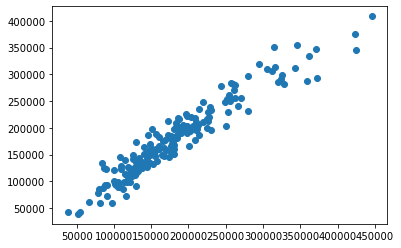

In [107]:
plt.scatter(d_ytest,li_pred)

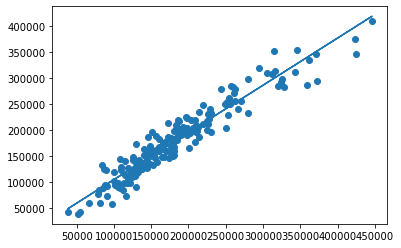

In [108]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(d_ytest, li_pred)

def myfunc(d_ytest):
    return slope * d_ytest + intercept

mymodel = list(map(myfunc, d_ytest))

plt.scatter(d_ytest, li_pred)
plt.plot(d_ytest, mymodel)
plt.show()

In [109]:
li_pred_test=ln.predict(df_test)
li_pred_test

array([217908.84558057, 239274.75161641, 220590.32235044, 217876.73798809,
       258160.14896801, 284570.4651606 , 155088.46119078, 145123.4902145 ,
       191329.2586932 , 177708.3742063 , 380058.59969031, 296473.17132607,
       325430.92003649, 326516.99006406, 344196.7405245 , 254255.99362293,
       243273.10564702, 218203.28779541, 229361.51902968, 259760.40637365,
       286490.37673147, 244551.44428031, 257100.96679394, 322615.46740315,
       298324.09904306, 238066.98614925, 231955.57797784, 224587.25403189,
       208088.0267594 , 288332.90693727, 269369.27004617, 260269.67541036,
       311328.66043833, 211155.85876591, 215945.29075968, 214028.84252221,
       271738.65650011, 197360.81852586, 162886.77959859, 171746.85212654,
       190099.78614753,  91536.69978049, 253614.98433167, 185734.20923826,
       221297.52597103, 179992.96468939, 232215.6832061 , 166810.38670806,
       229345.77078951, 272375.62653079, 124554.93622391, 278287.28787551,
       197095.77695486, 2

In [110]:
li_prediction= pd.DataFrame({'ID':idd , 'Sale Price':np.round(li_pred_test)})
li_prediction

,ID,Sale Price
2,1463,217909.0
3,1464,239275.0
5,1466,220590.0
7,1468,217877.0
8,1469,258160.0
10,1471,284570.0
11,1472,155088.0
12,1473,145123.0
13,1474,191329.0
14,1475,177708.0


In [111]:
li_prediction.to_csv('linear_prediction')